## Domača naloga 6
Marko Tacer, 23222087

Podatki: \
Kvantizacija \
frekvenca: 5 Hz \
Dolžina segmenta: 3 $s$
Ramp

Pri vaji smo si pogledali obdelavo izmerjenih signalov na prejšnji vaji. Za vsako izemd točk smo naredili FRFje, pred tem pa smo isgnale "popravili" s pomočjo oken.

In [1]:
import lvm_read
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
#import pyEMA;
%matplotlib inline
X = 5/1024

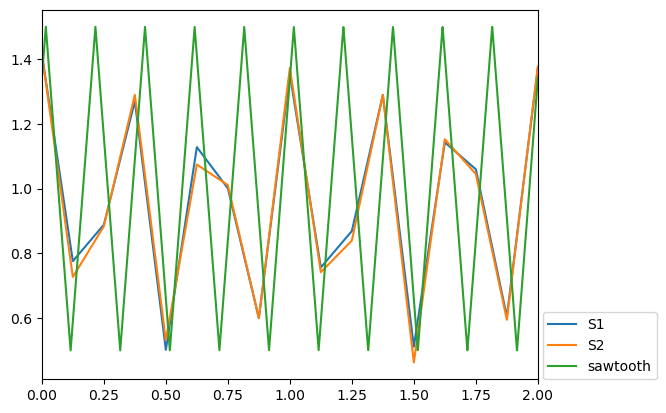

In [24]:
file = f'S2.lvm'
loaded_data = lvm_read.read(file)
loaded_data[0]['data'].shape[0]
S = loaded_data[0]['data'].T
t = S[1]
S1 = S[2]
S2 = S[3]

S2
t_spl = np.linspace(0, 4, 10000)
plt.plot(t, S1, label='S1')
plt.plot(t, S2, label='S2')
plt.plot(t_spl, -0.5*(signal.sawtooth(2 * np.pi * 5 * t_spl - 0.5, width=0.5)) + 1, label='sawtooth')
plt.xlim(0, 8*0.25)
plt.legend(loc=(1.01, 0))
plt.show()

### Priprava: Exponential okno

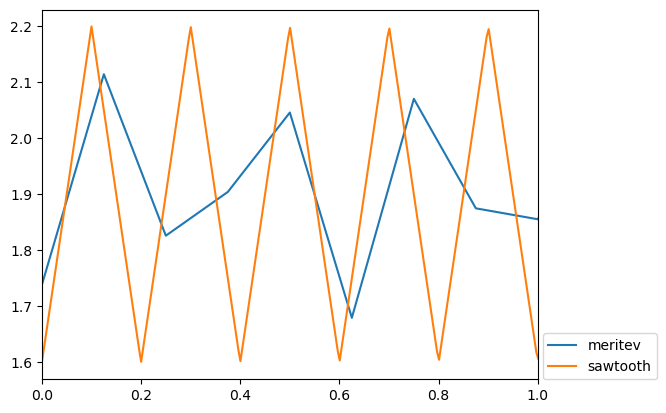

In [ ]:
file = f'S2.lvm'
loaded_data = lvm_read.read(file)
loaded_data[0]['data'].shape[0]
S = loaded_data[0]['data'].T
t = S[0]
S1 = S[1]
S2 = S[2]

h = 32
k = int(t.size/h)
Ti = np.array([[0.00 for i in range(h)] for j in range(k)])
S11 = np.array([[0.00 for i in range(h)] for j in range(k)])
S22 = np.array([[0.00 for i in range(h)] for j in range(k)])
Ti.shape


for i in np.arange(k):
    ti = t[h*i:h*(i+1)]
    s1 = S1[h*i:h*(i+1)]
    s2 = S2[h*i:h*(i+1)]
    
    Ti[i] = ti
    S11[i] = s1
    S22[i] = s2
    
X = 0.30
F = 4
tt = np.linspace(0, 4, 1000)
plt.plot(Ti[F], S11[F],  label='meritev')
plt.plot(tt, X*(signal.sawtooth(2 * np.pi * 5 * tt, width=0.5)) + 1.9, label='sawtooth')
plt.xlim(0, 1)
plt.legend(loc=(1.01, 0))
plt.show()  

In [ ]:
40*5/1024

0.1953125